# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#!pip install citipy

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data\cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=100)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=100)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

76

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#x=cities[0]
#cityweather=requests.get(f'http://api.openweathermap.org/data/2.5/weather?q={x}&appid={weather_api_key}').json()
#pprint(cityweather)

In [4]:
baseurl= 'http://api.openweathermap.org/data/2.5/weather?q='
key='&appid='+weather_api_key

realCities,fakeCities=[],[]
maxtemps,hums,clouds,winds,countries,dts = [],[],[],[],[],[]
lats,lngs, hemi =[],[],[]

for city in cities: 
    url = baseurl + city + key
    weatherDict = requests.get(url).json()
    if 'coord' in weatherDict:
        K=float(weatherDict['main']['temp_max'])
        F = ((K + (-273.15)) * (9/5)) + 32
        maxtemps.append(F)
        hums.append(weatherDict['main']['humidity'])
        clouds.append(weatherDict['clouds']['all'])
        winds.append(weatherDict['wind']['speed'])
        lats.append(weatherDict['coord']['lat'])
        lngs.append(weatherDict['coord']['lon'])
        countries.append(weatherDict['sys']['country'])
        dts.append(weatherDict['dt'])
        
        if weatherDict['coord']['lat'] > 0:
            hemi.append('north')
        else:
            hemi.append('south')
        
        realCities.append(city)
        
        y=len(realCities)
        print(f'Successfully retrieved data for city {y}: {city}')
    else:
        fakeCities.append(city)

print('\n\n\nData retrieval complete.')

cityDF = pd.DataFrame({
    'City':realCities,
    'Latitude':lats,
    'Longitude':lngs,
    'Maximum Temperature':maxtemps,
    'Humidity':hums,
    'Cloud Cover':clouds,
    'Wind Speed':winds,
    'Country':countries,
    'Datetime':dts,
    'Hemisphere':hemi
})


Successfully retrieved data for city 1: vanimo
Successfully retrieved data for city 2: rikitea
Successfully retrieved data for city 3: saskylakh
Successfully retrieved data for city 4: ocos
Successfully retrieved data for city 5: kapaa
Successfully retrieved data for city 6: cape town
Successfully retrieved data for city 7: severo-kurilsk
Successfully retrieved data for city 8: ushuaia
Successfully retrieved data for city 9: bogorodskoye
Successfully retrieved data for city 10: faanui
Successfully retrieved data for city 11: thompson
Successfully retrieved data for city 12: hermanus
Successfully retrieved data for city 13: atuona
Successfully retrieved data for city 14: nemuro
Successfully retrieved data for city 15: khatanga
Successfully retrieved data for city 16: chokurdakh
Successfully retrieved data for city 17: mataura
Successfully retrieved data for city 18: jelgava
Successfully retrieved data for city 19: cockburn town
Successfully retrieved data for city 20: cidreira
Successfu

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cityDF.to_csv('cities.csv')

cityDF.head()

,City,Latitude,Longitude,Maximum Temperature,Humidity,Cloud Cover,Wind Speed,Country,Datetime,Hemisphere
0,vanimo,-2.6741,141.3028,77.900,90,100,1.94,PG,1622319548,south
1,rikitea,-23.1203,-134.9692,77.216,86,91,8.93,PF,1622318979,south
2,saskylakh,71.9167,114.0833,30.938,96,61,3.66,RU,1622319386,north
3,ocos,14.5094,-92.1933,87.980,69,63,4.18,GT,1622319549,north
4,kapaa,22.0752,-159.3190,81.122,70,20,0.89,US,1622318970,north


In [6]:
cityDF.shape

(72, 10)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
cityDF['Humidity'].max()
# No cities over 100% humidity
# but random selection may change this later

98

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
new_cityDF=cityDF[cityDF['Humidity']<=100]
new_cityDF.shape

(72, 10)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

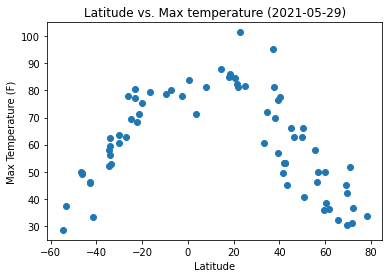

In [9]:
import datetime
today=datetime.date.today()

plt.scatter(new_cityDF['Latitude'],new_cityDF['Maximum Temperature'])
plt.title(f'Latitude vs. Max temperature ({today})')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.savefig('latVtemp')
plt.show()

## Latitude vs. Humidity Plot

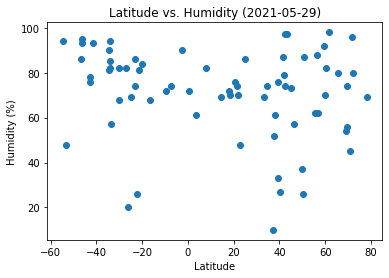

In [10]:
plt.scatter(new_cityDF['Latitude'],new_cityDF['Humidity'])
plt.title(f'Latitude vs. Humidity ({today})')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.savefig('latVhum')
plt.show()

## Latitude vs. Cloudiness Plot

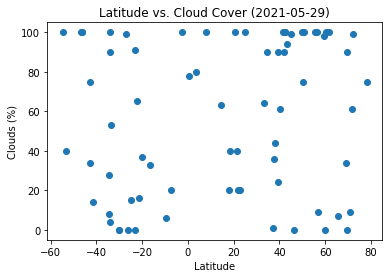

In [11]:
plt.scatter(new_cityDF['Latitude'],new_cityDF['Cloud Cover'])
plt.title(f'Latitude vs. Cloud Cover ({today})')
plt.ylabel('Clouds (%)')
plt.xlabel('Latitude')
plt.savefig('latVcloud')
plt.show()

## Latitude vs. Wind Speed Plot

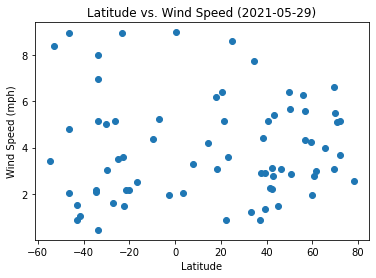

In [12]:
plt.scatter(new_cityDF['Latitude'],new_cityDF['Wind Speed'])
plt.title(f'Latitude vs. Wind Speed ({today})')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.savefig('latVwind')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

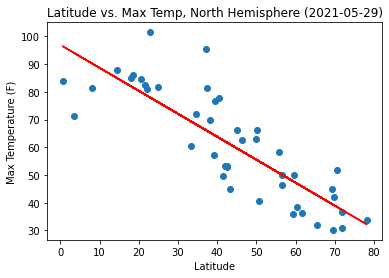

Line Equation: y = -0.8 x + 96.9
The r2 value is 0.7043


In [29]:
northDF = new_cityDF[new_cityDF['Hemisphere'] == 'north']
southDF = new_cityDF[new_cityDF['Hemisphere'] == 'south']

from scipy.stats import linregress
import numpy as np

x = northDF['Latitude']
y = northDF['Maximum Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = (x * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.title(f'Latitude vs. Max Temp, North Hemisphere ({today})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('latVtemp_N_linreg')
plt.show()

print(f'Line Equation: y = {slope:.1f} x + {intercept:.1f}')
print(f'The r2 value is {rvalue **2:.4f}')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

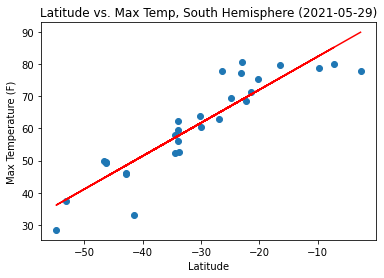

Line Equation: y = 1.0 x + 92.6
The r2 value is 0.8224


In [30]:
x = southDF['Latitude']
y = southDF['Maximum Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = (x * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.title(f'Latitude vs. Max Temp, South Hemisphere ({today})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('latVtemp_S_linreg')
plt.show()

print(f'Line Equation: y = {slope:.1f} x + {intercept:.1f}')
print(f'The r2 value is {rvalue **2:.4f}')


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

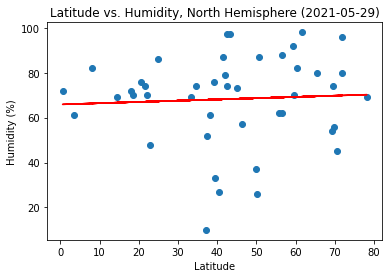

Line Equation: y = 0.1 x + 65.9
The r2 value is 0.0031


In [32]:
x = northDF['Latitude']
y = northDF['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = (x * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.title(f'Latitude vs. Humidity, North Hemisphere ({today})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('latVhum_N_linreg')
plt.show()

print(f'Line Equation: y = {slope:.1f} x + {intercept:.1f}')
print(f'The r2 value is {rvalue **2:.4f}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

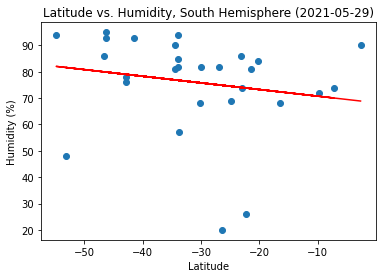

Line Equation: y = -0.3 x + 68.2
The r2 value is 0.0317


In [33]:
x = southDF['Latitude']
y = southDF['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = (x * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.title(f'Latitude vs. Humidity, South Hemisphere ({today})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('latVhum_S_linreg')
plt.show()

print(f'Line Equation: y = {slope:.1f} x + {intercept:.1f}')
print(f'The r2 value is {rvalue **2:.4f}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

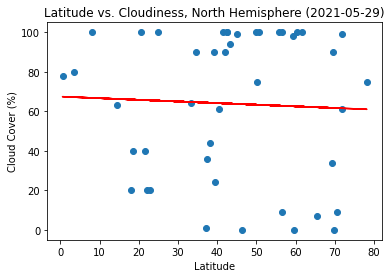

Line Equation: y = -0.1 x + 67.5
The r2 value is 0.0020


In [34]:
x = northDF['Latitude']
y = northDF['Cloud Cover']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = (x * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.title(f'Latitude vs. Cloudiness, North Hemisphere ({today})')
plt.xlabel('Latitude')
plt.ylabel('Cloud Cover (%)')
plt.savefig('latVcloud_N_linreg')
plt.show()

print(f'Line Equation: y = {slope:.1f} x + {intercept:.1f}')
print(f'The r2 value is {rvalue **2:.4f}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

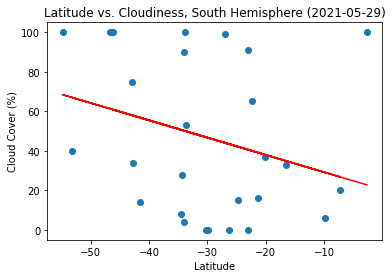

Line Equation: y = -0.9 x + 20.4
The r2 value is 0.0842


In [35]:
x = southDF['Latitude']
y = southDF['Cloud Cover']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = (x * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.title(f'Latitude vs. Cloudiness, South Hemisphere ({today})')
plt.xlabel('Latitude')
plt.ylabel('Cloud Cover (%)')
plt.savefig('latVcloud_S_linreg')
plt.show()

print(f'Line Equation: y = {slope:.1f} x + {intercept:.1f}')
print(f'The r2 value is {rvalue **2:.4f}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

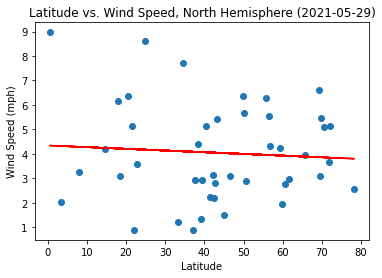

Line Equation: y = -0.0 x + 4.3
The r2 value is 0.0048


In [36]:
x = northDF['Latitude']
y = northDF['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = (x * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.title(f'Latitude vs. Wind Speed, North Hemisphere ({today})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('latVwind_N_linreg')
plt.show()

print(f'Line Equation: y = {slope:.1f} x + {intercept:.1f}')
print(f'The r2 value is {rvalue **2:.4f}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

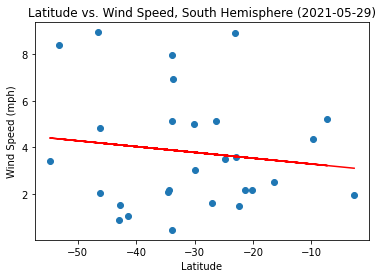

Line Equation: y = -0.0 x + 3.0
The r2 value is 0.0171


In [37]:
x = southDF['Latitude']
y = southDF['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = (x * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.title(f'Latitude vs. Wind Speed, South Hemisphere ({today})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('latVwind_S_linreg')
plt.show()

print(f'Line Equation: y = {slope:.1f} x + {intercept:.1f}')
print(f'The r2 value is {rvalue **2:.4f}')

In [47]:
print('''
-------------------------
------- ANALYSIS --------
-------------------------

There is a clear and strong correlation between temperature and latitude. 
The temperature tends to be higher closer to the equator, and get lower the further you get from the equator. 
The r2 values are above 0.7 or even 0.8 showing a very strong correlation.
This is entirely as expected, considering what we know about temperature across the world.

The other factors are less stong. The r2 values are extremely low, meaning any noticeable slope is more like coincidence. 

The only factor that shows some consistency is Humidity. The slopes are mirrored around the equator, similar to temperature, which suggests a more purposeful correlation. However the r2 values are still barely relevant.
''')


-------------------------
------- ANALYSIS --------
-------------------------

There is a clear and strong correlation between temperature and latitude. 
The temperature tends to be higher closer to the equator, and get lower the further you get from the equator. 
The r2 values are above 0.7 or even 0.8 showing a very strong correlation.
This is entirely as expected, considering what we know about temperature across the world.

The other factors are less stong. The r2 values are extremely low, meaning any noticeable slope is more like coincidence. 

The only factor that shows some consistency is Humidity. The slopes are mirrored around the equator, similar to temperature, which suggests a more purposeful correlation. However the r2 values are still barely relevant.

